<a href="https://colab.research.google.com/github/vinishareddymalgari5985-create/crop-price-prediction/blob/main/crop_price_prediction_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving crop_price_dataset.csv to crop_price_dataset.csv
First 5 rows of dataset:
        month commodity_name  avg_modal_price  avg_min_price  avg_max_price  \
0  2025-03-01          Maize          2341.58        2191.23        2402.98   
1  2025-02-01          Maize          2356.01        2202.35        2414.46   
2  2025-01-01          Maize          2382.20        2221.31        2448.22   
3  2024-12-01          Maize          2328.78        2164.86        2411.66   
4  2024-11-01          Maize          2273.46        2077.63        2377.78   

  state_name district_name calculationType  change  
0      India           All         Monthly  -14.43  
1      India           All         Monthly  -26.19  
2      India           All         Monthly   53.42  
3      India           All         Monthly   55.32  
4      India           All         Monthly   35.48  

Column names:
Index(['month', 'commodity_name', 'avg_modal_price', 'avg_min_price',
       'avg_max_price', 'state_name', 'di

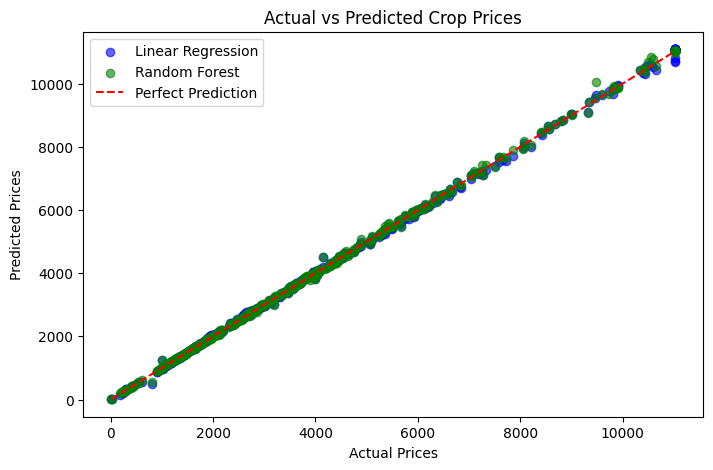

In [1]:
# ===================================================
# WEEK-2: ML Model Implementation (60% Completion)
# ===================================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 2: Upload Dataset
uploaded = files.upload()
filename = list(uploaded.keys())[0]

if filename.endswith(".csv"):
    df = pd.read_csv(filename)
elif filename.endswith((".xls", ".xlsx")):
    df = pd.read_excel(filename)
else:
    raise ValueError("Unsupported file format")

# Step 3: Dataset Overview
print("First 5 rows of dataset:")
print(df.head())
print("\nColumn names:")
print(df.columns)

# Step 4: Rename column (optional clarity)
if "commodity_name" in df.columns:
    df.rename(columns={"commodity_name": "Crop"}, inplace=True)

# Step 5: Handle Missing Values
for col in df.columns:
    if df[col].dtype == "object":   # categorical
        df[col] = df[col].fillna(df[col].mode()[0])
    else:                           # numerical
        df[col] = df[col].fillna(df[col].median())

# Step 6: Remove Duplicates
df.drop_duplicates(inplace=True)

# Step 7: Handle Outliers (IQR Method)
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

# Step 8: Encode Categorical Variables
cat_cols = df.select_dtypes(include="object").columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Step 9: Define Features (X) and Target (y)
if "avg_modal_price" not in df.columns:
    raise ValueError("Target column 'avg_modal_price' not found in dataset")

X = df.drop("avg_modal_price", axis=1)
y = df["avg_modal_price"]

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===================================================
# Step 10: Model Training & Evaluation
# ===================================================

# --- Linear Regression ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\nLinear Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))

# --- Random Forest Regressor ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

# ===================================================
# Step 11: Visualization (Actual vs Predicted)
# ===================================================

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, color="blue", alpha=0.6, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, color="green", alpha=0.6, label="Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Crop Prices")
plt.legend()
plt.show()
